In [34]:
import torch 
import numpy as np 

In [35]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [36]:
torch.rand(2,2)

tensor([[0.3074, 0.6341],
        [0.4901, 0.8964]])

In [37]:
torch.randn(2,2)

tensor([[-1.0845, -1.3986],
        [ 0.4033,  0.8380]])

In [38]:
torch.manual_seed(0) #seed
torch.rand(2,2)

tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])

In [39]:
torch.manual_seed(0)
torch.rand(2,2)

tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])

In [40]:
if torch.cuda.is_available():
    torch.manual_seed_all(0)

In [41]:
npone = np.ones((2,2))

In [42]:
tone = torch.from_numpy(npone) #converting from numpy to torch tensor

In [43]:
print(tone)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)


In [44]:
npone = tone.numpy() #from torch to numpy

In [45]:
x = torch.ones(2,2)

In [46]:
print(x)

tensor([[1., 1.],
        [1., 1.]])


In [47]:
print(x.size())

torch.Size([2, 2])


In [48]:
x = x.view(4)

In [49]:
x = x.view(1,4)

In [50]:
print(x.size())

torch.Size([1, 4])


In [51]:
c = torch.ones(2,2)

In [52]:
a = c

In [53]:
c.add_(a)          #Inplace addition

tensor([[2., 2.],
        [2., 2.]])

In [54]:
f

In [55]:
a = Variable(torch.ones(2,2), requires_grad = True)

In [56]:
x = Variable(torch.FloatTensor([2.0,2.0]), requires_grad = True) #define variable
y = 5*(x+1)**2                                                   #define loss function
print(y) 
o = (1/2)*sum(y)                                                 #convert to scalar through mean    
print(o)
o.backward()                                                    #compute gradient 
x.grad                                                           #show gradient 

tensor([45., 45.], grad_fn=<MulBackward0>)
tensor(45., grad_fn=<MulBackward0>)


tensor([15., 15.])

In [57]:
import torch.nn as nn

In [58]:
class LinearRegression(nn.Module):                      #always have to do 
    def __init__(self, input_size, output_size):             #always do 
        super(LinearRegression, self).__init__()        #inherit everything from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)       #call the linear reg
    def forward(self,x):                    
        out = self.linear(x)                                 #output 
        return out

In [59]:
x = [i for i in range(11)]

In [60]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [61]:
x = np.array(x, dtype = np.float32)
x = x.reshape(-1,1)

In [62]:
x
y = 2*x + 1
y = y.astype(np.float32)
y = y.reshape(-1,1)
#print(y)

In [63]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [64]:
print(x)
print(y)

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])
tensor([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]])


In [65]:
criterion = nn.MSELoss()

In [66]:
learning_rate = 0.01 
input_dim = 1
output_dim = 1 
model = LinearRegression(input_dim, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [67]:
epochs = 100

In [68]:
for epoch in range(epochs):
    inputs = Variable(x)
    Labels = Variable(y)
    optimizer.zero_grad() 
    outputs = model(inputs)
    loss =criterion(outputs, Labels)
    loss.backward() 
    optimizer.step() 
    print('epoch {}, loss {}'.format(epoch+1, loss.item()))
    
    

epoch 1, loss 217.1048126220703
epoch 2, loss 17.74608039855957
epoch 3, loss 1.4846025705337524
epoch 4, loss 0.15779036283493042
epoch 5, loss 0.049156706780195236
epoch 6, loss 0.03989074006676674
epoch 7, loss 0.03873426094651222
epoch 8, loss 0.03824368864297867
epoch 9, loss 0.037812016904354095
epoch 10, loss 0.03738926351070404
epoch 11, loss 0.03697174787521362
epoch 12, loss 0.036558911204338074
epoch 13, loss 0.03615058213472366
epoch 14, loss 0.03574690222740173
epoch 15, loss 0.03534780442714691
epoch 16, loss 0.03495308384299278
epoch 17, loss 0.03456275910139084
epoch 18, loss 0.034176796674728394
epoch 19, loss 0.03379516303539276
epoch 20, loss 0.033417709171772
epoch 21, loss 0.03304457664489746
epoch 22, loss 0.03267562389373779
epoch 23, loss 0.03231063112616539
epoch 24, loss 0.03194985166192055
epoch 25, loss 0.031593095511198044
epoch 26, loss 0.031240295618772507
epoch 27, loss 0.03089153952896595
epoch 28, loss 0.03054657205939293
epoch 29, loss 0.0302054025232

In [69]:
predicted = model(x).data.numpy()

In [70]:
predicted

array([[ 0.782995 ],
       [ 2.8142457],
       [ 4.845496 ],
       [ 6.876747 ],
       [ 8.907998 ],
       [10.939249 ],
       [12.970499 ],
       [15.00175  ],
       [17.033    ],
       [19.06425  ],
       [21.095503 ]], dtype=float32)

In [71]:
import matplotlib.pyplot as plt 

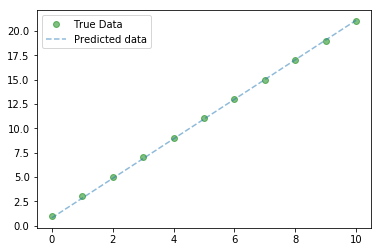

In [72]:
plt.clf()
plt.plot(x.numpy(),y.numpy(), 'go', label =  "True Data", alpha = 0.5)
plt.plot(x.numpy(),predicted,'--', label = 'Predicted data', alpha = 0.5)
plt.legend()
plt.show()